In [18]:
import numpy as np
from numpy import nan

from verbose.verbose import print_state, print_experience, print_buffer, print_shapes
from verbose.verbose import print_action_available, print_interaction
from verbose.performance import print_performance, print_episode_duration
from utils.constant import *
from verbose.plot import plot_evolution
from environnement.pre_processing import pre_processing_state, denormalize_vector


from agent.DQN import DQNAgent
from environnement.env import Env
from agent.strategy import EpsilonGreedy

%load_ext autoreload
%autoreload 2


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
sess = InteractiveSession(config=config)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2022-07-07 11:13:00.240441: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-07 11:13:00.240672: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/widium/.conda/envs/tf_gpu/lib/python3.8/site-packages/tensorflow/python/client/session.py:1771: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [19]:
STACK_SIZE = 3
NBR_STACK = 2
EPISODE = 20

env = Env(STACK_SIZE)
strategy = EpsilonGreedy(MIN_EPSILON, START_EPSILON, DECAY)
agent = DQNAgent(STACK_SIZE, NBR_STACK, len(env.action_space()))

In [20]:
print_state(env, shape=True)

---State t---
-A-	-B-
___________	
|975.0          	xxx|
|970.0          	xxx|
|299.0          	xxx|
___________	
A shape : (3, 1)
B shape : (3, 1)
___________	
------------
Env : in progress
------------


========= Episode : [0] =========
---State t---
-A-	-B-
___________	
|587.0          	xxx|
|845.0          	xxx|
|448.0          	xxx|
___________	
------------
Env : in progress
------------
=== Actions available ===
rotate_a
inverse_rotate_a
swap_a
push_b
Exploration
----------------------------------
Action : [push_b]
Reward : [-1]
Epsilon : [0.9991504248583688]
----------------------------------
---State t---
-A-	-B-
___________	
|845.0          	587.0|
|448.0          	xxx|
|xxx            	xxx|
___________	
------------
Env : in progress
------------
=== Actions available ===
rotate_a
inverse_rotate_a
swap_a
push_b
push_a
Exploration
----------------------------------
Action : [push_a]
Reward : [-6]
Epsilon : [0.9983016988672331]
----------------------------------
---State t---
-A-	-B-
___________	
|587.0          	xxx|
|845.0          	xxx|
|448.0          	xxx|
___________	
------------
Env : in progress
------------
=== Actions available ===
rotate_a
inverse_rotate_a
swap_a
pu

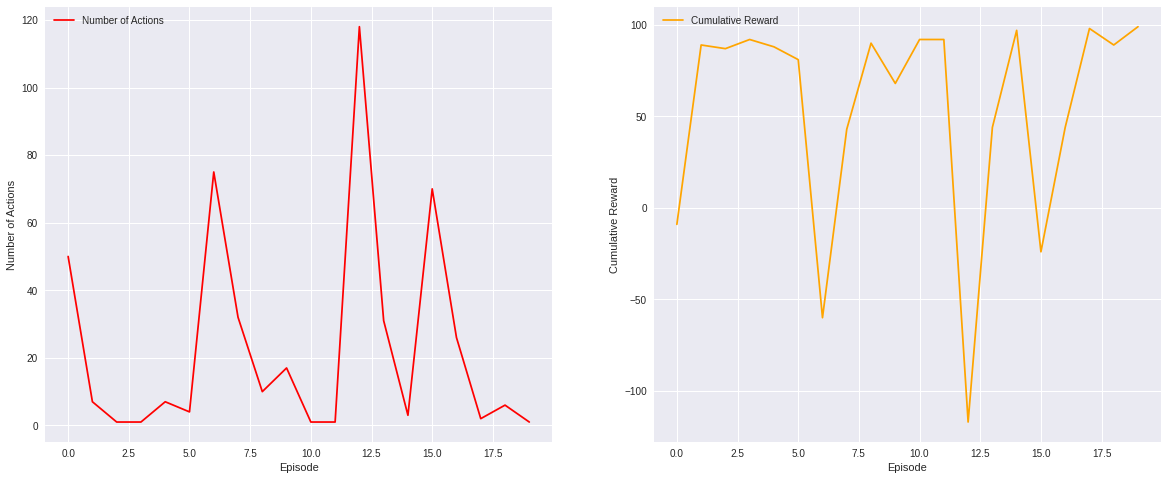

In [21]:
episode_durations = list()
cummulative_reward = list()
epsilon = list()
episode_list = list()

for episode in range(EPISODE):
    
    print(f"========= Episode : [{episode}] =========")
    env.reset(STACK_SIZE)
    
    state = env.get_state()
    # print_state(env, shape=True)
    
    timesteps = 0
    while (1):
        
        # action_available(env)
        print_state(env)
        timesteps += 1
        
        exploration_rate = strategy.get_exploration_rate(timesteps)
        print_action_available(env)
        action = env.choose_action(state, agent.policy_model, exploration_rate)
        reward = env.reward()
        next_state = env.get_state()
        print_interaction(exploration_rate, action, reward)
        
        
        
        experience = env.create_experience(state, action, next_state, reward)
        env.replaymemory.push(experience)
        state = next_state
        
        # print_experience(experience)
        if env.replaymemory.can_provide_sample(BATCH_SIZE):
            print("======== START TRAIN ========")
            
            buffer = env.replaymemory.get_sample(BATCH_SIZE)
            # print_buffer(buffer)
            
            states, actions, next_states, rewards, dones = env.replaymemory.extract_value(buffer)
            # print_shapes(states, next_states)
            agent.train(states, next_states, buffer)
        
        # print(f"Env : {env.state()}")
        if (env.state() == 'done'):
            print_state(env)
            print_performance(strategy.epsilon, timesteps, env.cummulative_reward)
            episode_list.append(episode)
            epsilon.append(strategy.epsilon)
            episode_durations.append(timesteps)
            cummulative_reward.append(env.cummulative_reward)            
            break
        
print_episode_duration(episode_durations)
# print("NUMBER OF ACTIONS", episode_durations)
plot_evolution(episode_list, episode_durations, cummulative_reward)
    
    

In [17]:
epsilon

[0.9940707764932498,
 0.9991504248583688,
 0.945711234647876,
 0.983168872310742,
 0.9991504248583688,
 0.9856721319396732,
 0.9974538211778671,
 0.9991504248583688,
 0.9991504248583688,
 0.9449159211362601,
 0.9145109508645355,
 0.9991504248583688,
 0.9856721319396732,
 0.9991504248583688,
 0.974054237114622,
 0.9991504248583688,
 0.9907012369590634,
 0.9915423586867929,
 0.994915269445845,
 0.9991504248583688]

In [6]:
env.replaymemory.print_history(BATCH_SIZE)

Actions : 2 	 Reward : 92
Actions : 6 	 Reward : -5
Actions : 1 	 Reward : -5
Actions : 4 	 Reward : -5
Actions : 4 	 Reward : -5
Actions : 6 	 Reward : -5
Actions : 4 	 Reward : -5
Actions : 1 	 Reward : -5
Actions : 6 	 Reward : -5
Actions : 2 	 Reward : -5
Actions : 1 	 Reward : -5
Actions : 1 	 Reward : -5
Actions : 6 	 Reward : -5
Actions : 6 	 Reward : -5
Actions : 4 	 Reward : -5
Actions : 6 	 Reward : -5
Actions : 1 	 Reward : -5
Actions : 2 	 Reward : -5
Actions : 2 	 Reward : -5
Actions : 6 	 Reward : -5
Actions : 6 	 Reward : -5
Actions : 4 	 Reward : -5
Actions : 2 	 Reward : -10
Actions : 6 	 Reward : -5
Actions : 1 	 Reward : -5
Actions : 4 	 Reward : -5
Actions : 4 	 Reward : -5
Actions : 4 	 Reward : -5
Actions : 4 	 Reward : -5
Actions : 4 	 Reward : -5
Actions : 6 	 Reward : -5
Actions : 1 	 Reward : -5
Actions : 4 	 Reward : -5
Actions : 4 	 Reward : -5
Actions : 6 	 Reward : -5
Actions : 1 	 Reward : -5
Actions : 6 	 Reward : -5
Actions : 1 	 Reward : -5
Actions : 1